# Big Data Analytics Project 2021 - Template

In [1]:
# Import packages used for the semester project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

## Task 1

### a)

In [2]:
df_train = pd.read_csv('training_data.csv',index_col = 'id')

df_validation = pd.read_csv('validation_data.csv',index_col = 'id')


print("Number of training objects: " + str(df_train.shape[0]))
print("Number of validation objects: " + str(df_validation.shape[0]))

Number of training objects: 12735
Number of validation objects: 4245


### b)

(-0.5, 1455.5, 1465.5, -0.5)

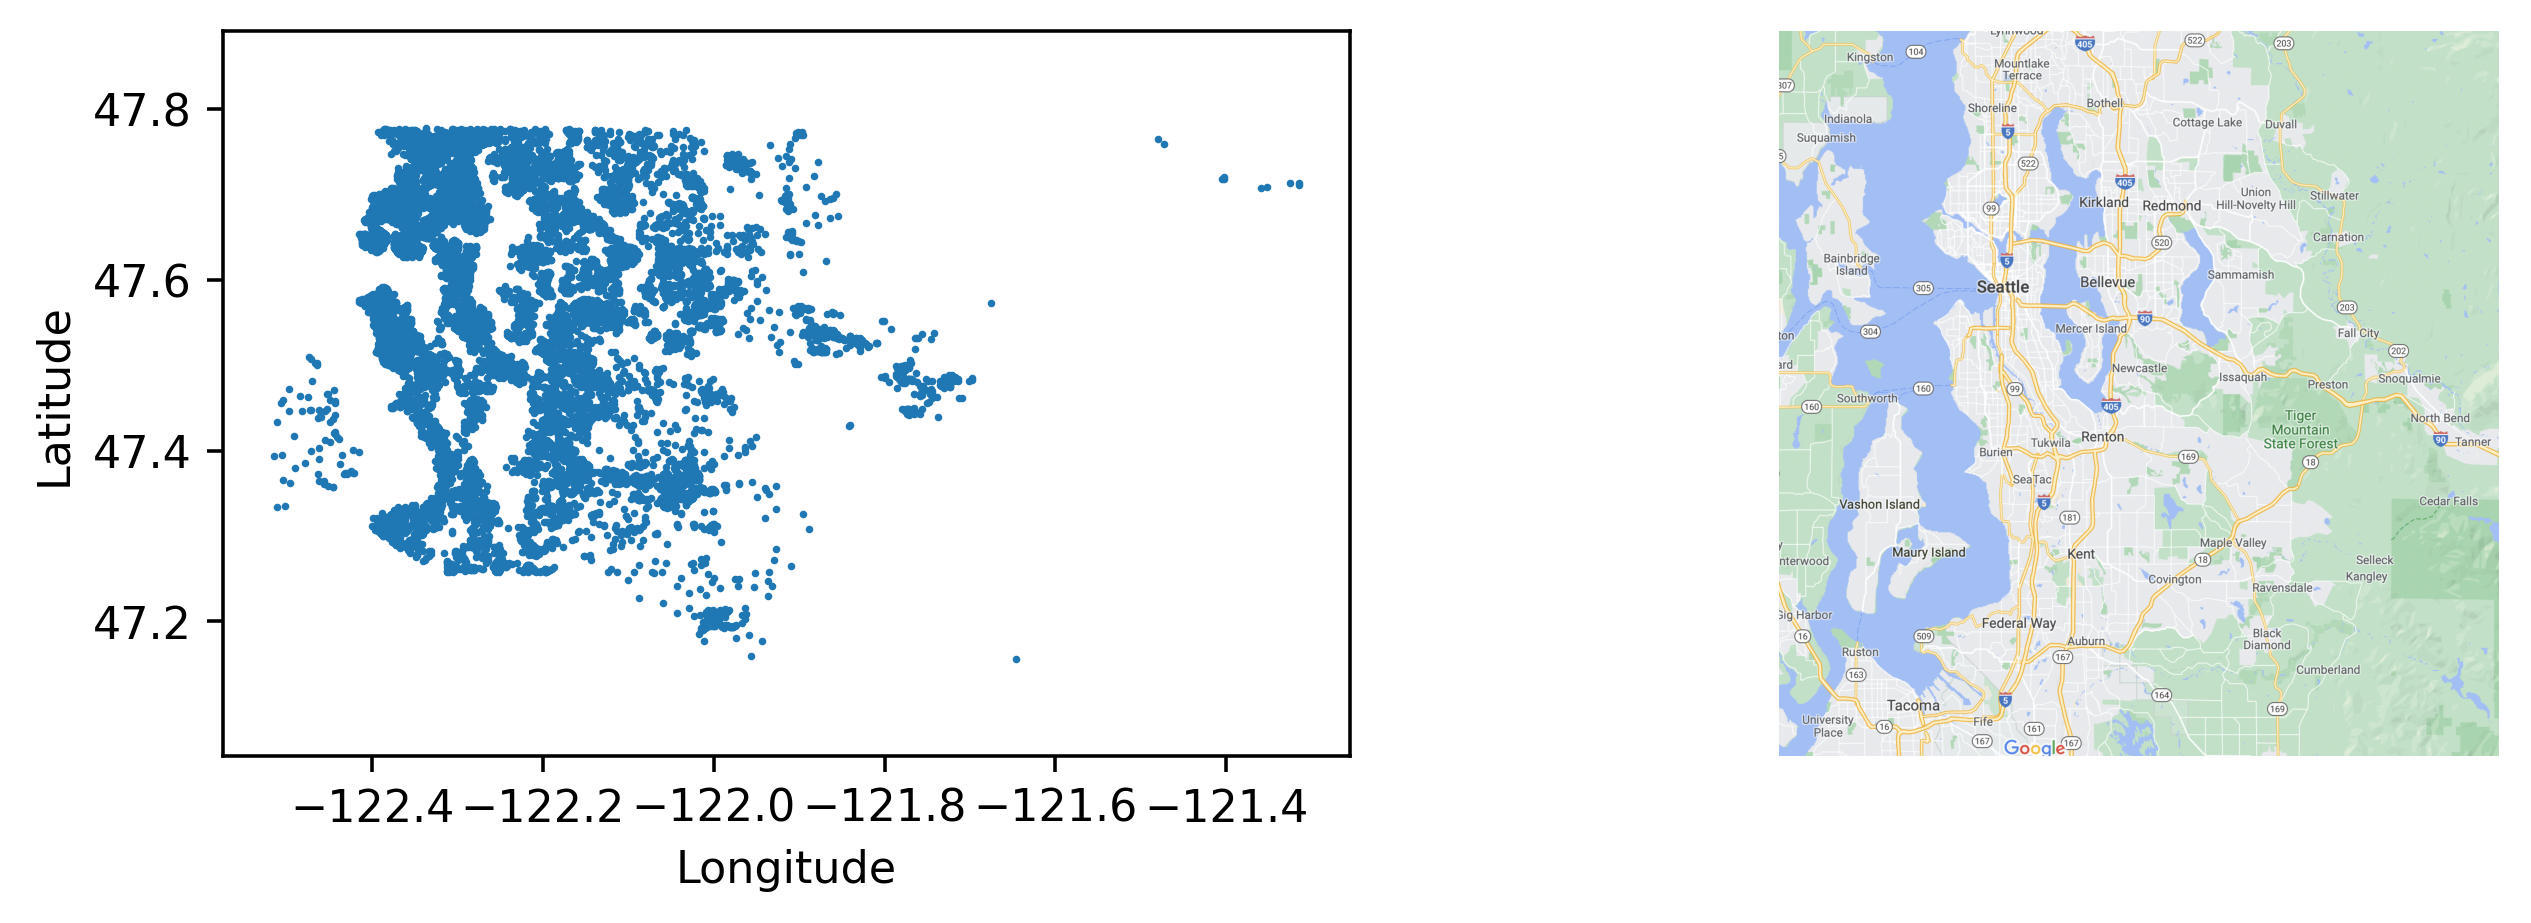

In [3]:
# Scatter plot

# Create figure
fig, (ax1, ax2) = plt.subplots(1,2, dpi=320, figsize = (10,3))
ax1.scatter(x=df_train['long'], y=df_train['lat'], s=0.5)
ax1.axis("equal")

# Add x- and y-label for the subplot
ax1.set(xlabel='Longitude', ylabel='Latitude')


# Add an image next to the plot
import matplotlib.image as mpimg
img = mpimg.imread('Seattle_map.png')
ax2.imshow(img)
ax2.axis('off')


# We can see Lake Washington and Elliott Bay

### c)

(-0.5, 1455.5, 1465.5, -0.5)

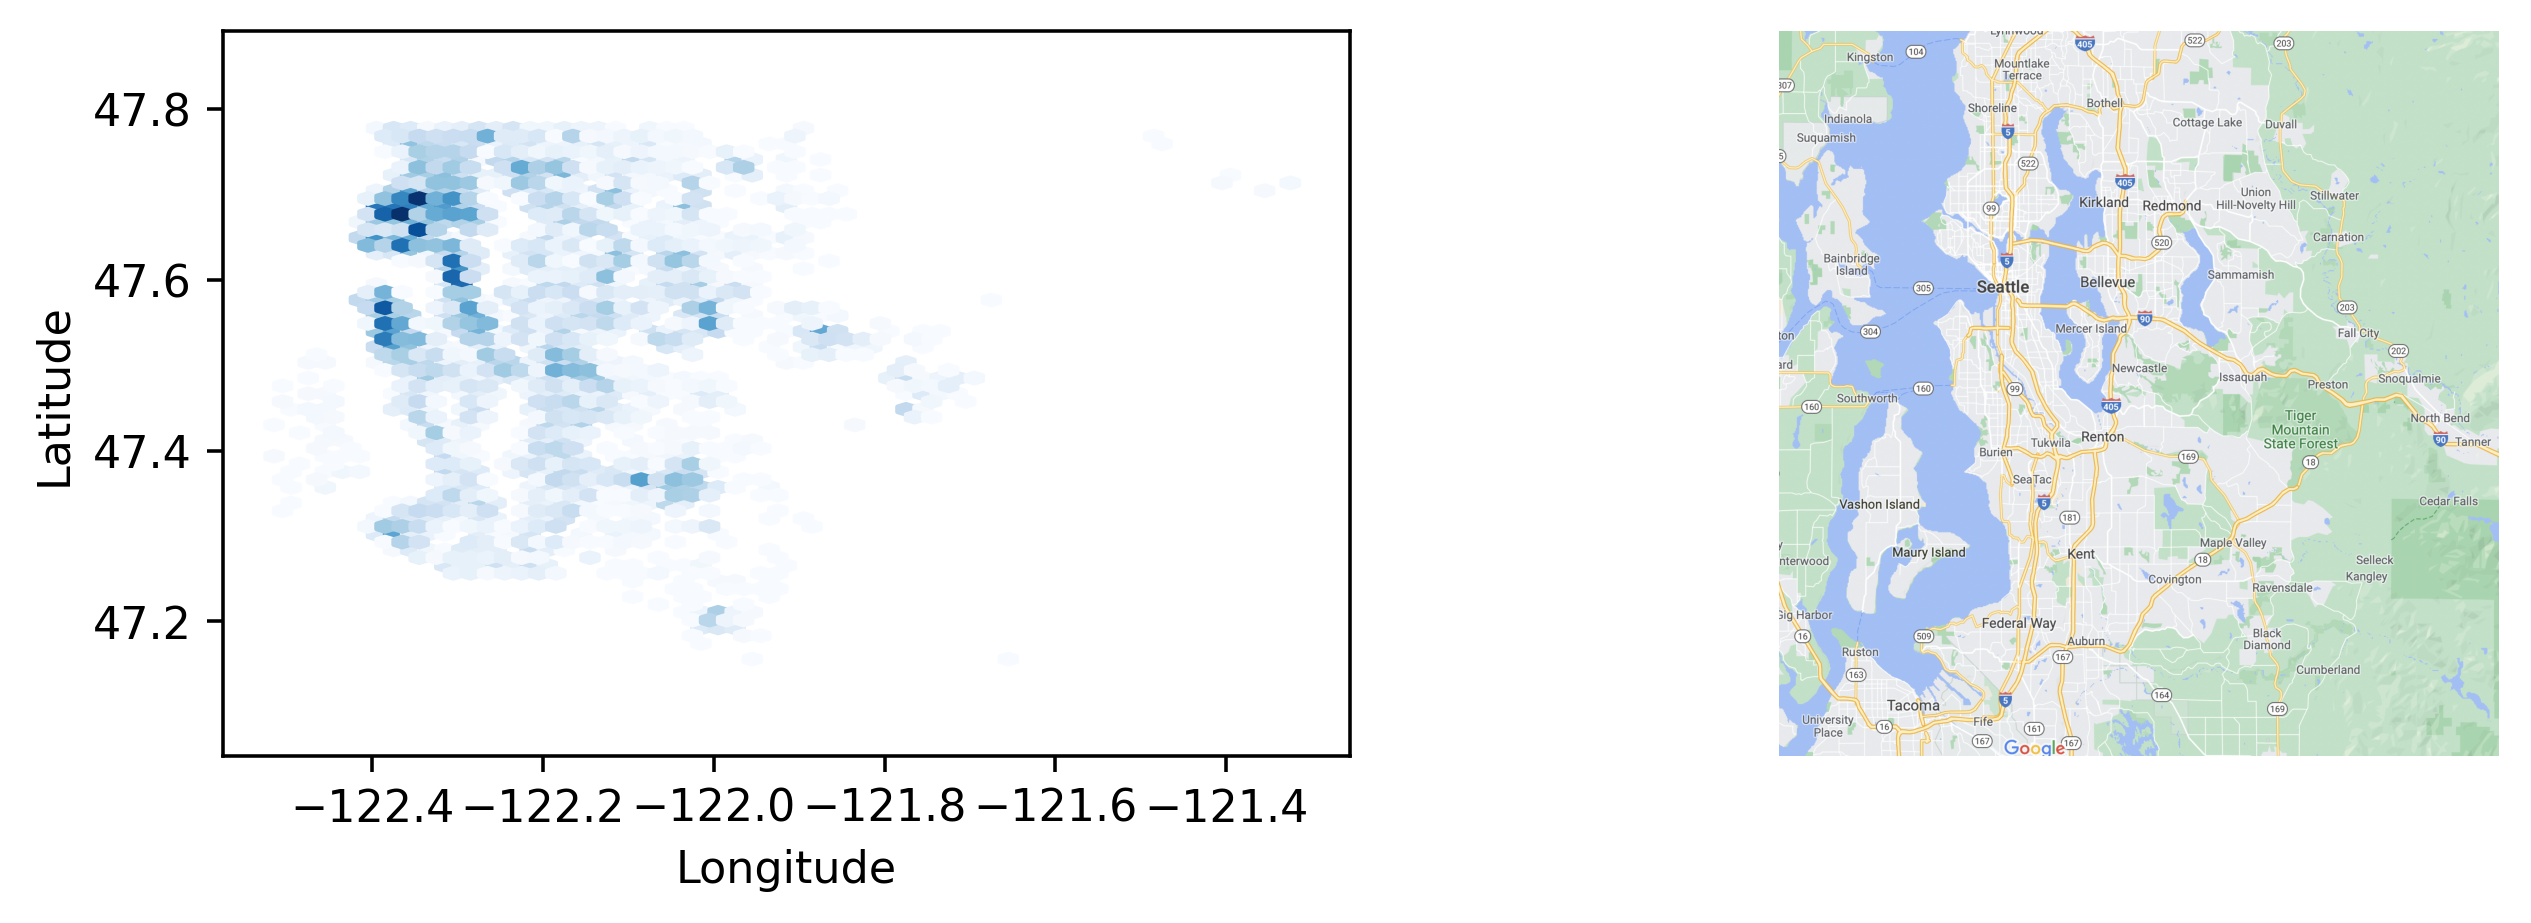

In [4]:
# Scatter plot

# Create figure
fig, (ax1, ax2) = plt.subplots(1,2, dpi=320, figsize = (10,3))
ax1.hexbin(x=df_train['long'], y=df_train['lat'], gridsize=60, mincnt=1, cmap='Blues')
ax1.axis("equal")

# Add x- and y-label for the subplot
ax1.set(xlabel='Longitude', ylabel='Latitude')


# Add an image next to the plot
import matplotlib.image as mpimg
img = mpimg.imread('Seattle_map.png')
imgplot = plt.imshow(img)
plt.axis('off')

### d)

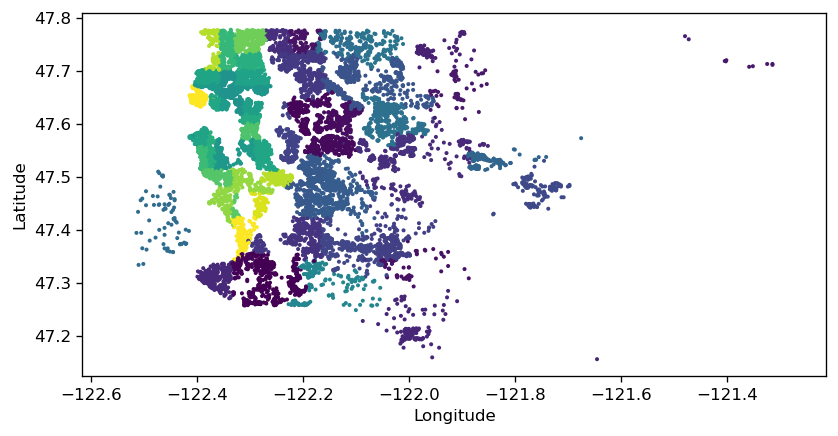

In [5]:
# Scatter plot
# Create figure
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot
plt.scatter(x=df_train['long'], y=df_train['lat'], s=2, c = df_train['zipcode'])
plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');

### e)

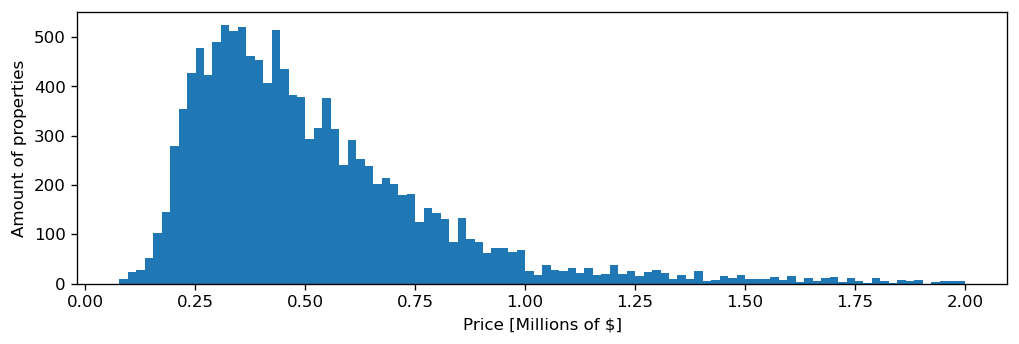

In [803]:
# Histogram
# Create figure
plt.figure(figsize=(10, 3), dpi=120)
# Create histogram
plt.hist(df_train['price']/1e6, bins = 100);

# Add x- and y-label
plt.xlabel('Price [Millions of $]')
plt.ylabel('Amount of properties');

### f) 

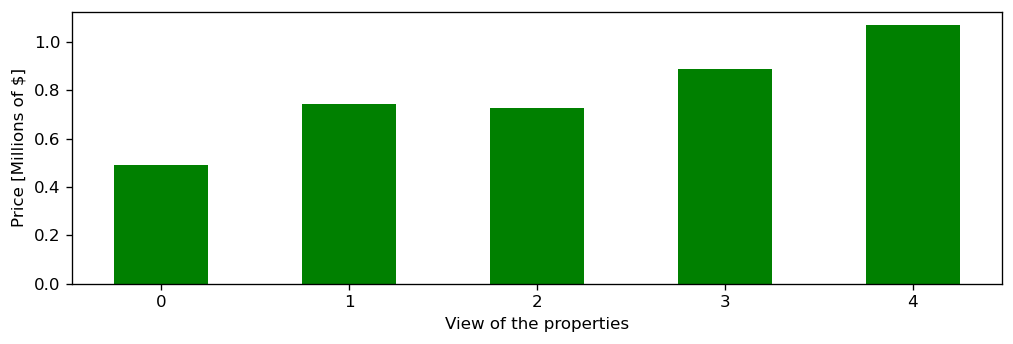

In [804]:
# Barplot
# Create figure

plt.figure(figsize=(10,3), dpi=120) 
bar_width = 0.5

# Create Series with heights of barplots

view = df_train.groupby('view').mean()
x = np.arange(len(view)) # Create barplot

plt.bar(x, view['price']/1e6, bar_width, color = 'g')
# Set x-ticks to labels
plt.gca().set_xticks(x)
plt.gca().set_xticklabels(list(view.index));

# Add x- and y-label
plt.xlabel('View of the properties')
plt.ylabel('Price [Millions of $]');

### g)

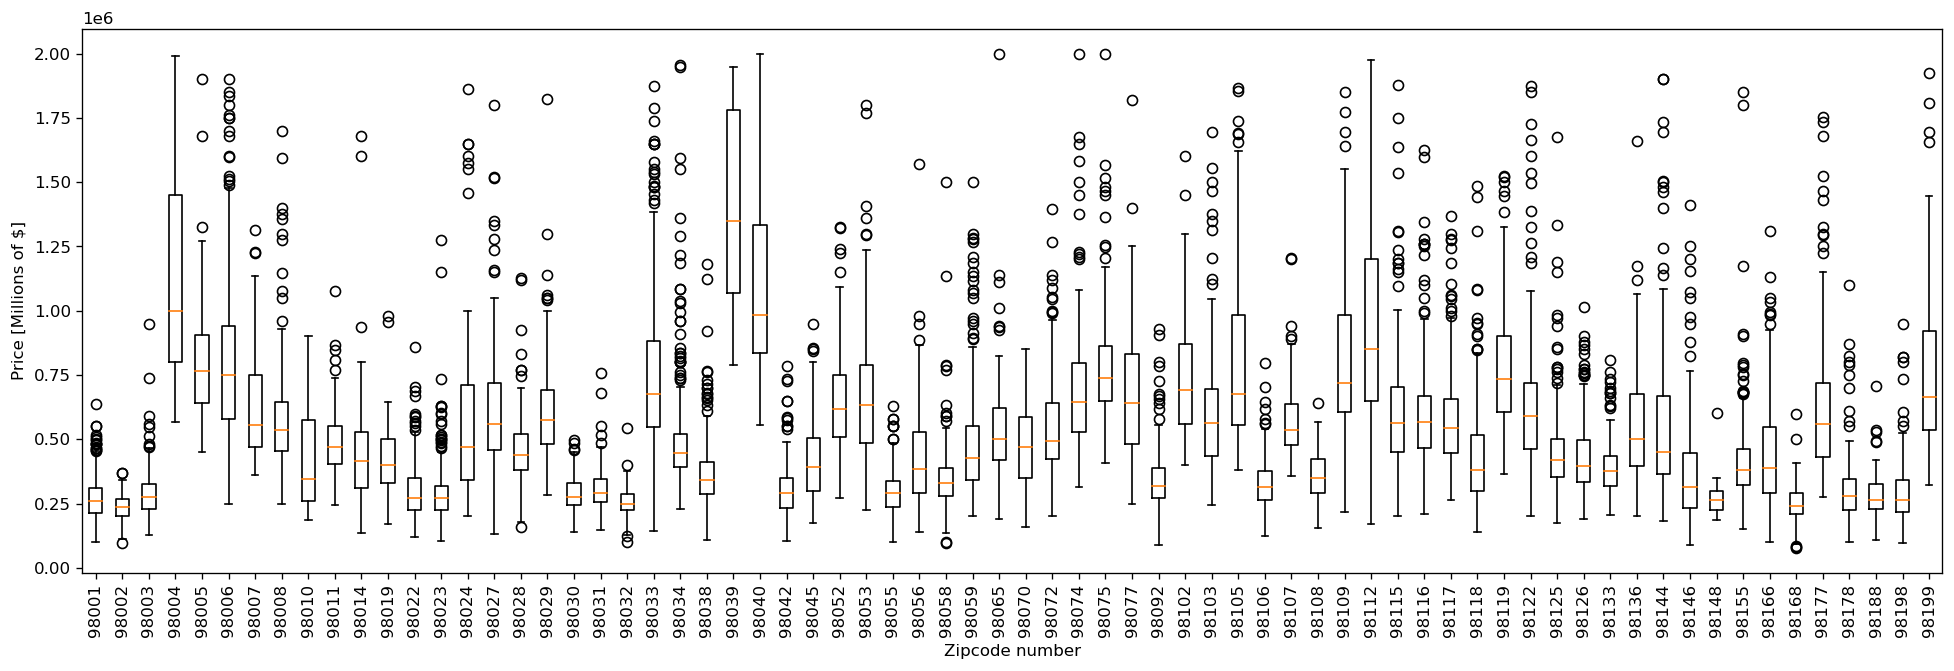

In [805]:
# Multiple boxplots
# Create figure
plt.figure(figsize=(20, 6), dpi=120)

# Create Series grouped by 'zipcode'
df_train_boxplot = df_train.set_index('price')
boxes = pd.Series(df_train_boxplot.groupby('zipcode').groups)

# Create multiple boxplots
plt.boxplot(boxes) # Set logarithmical y-scale
#plt.yscale('log')



# Set x-ticks to label
plt.xticks(np.linspace(1,70,70), boxes.index, rotation = 90);
plt.xlabel('Zipcode number');
plt.ylabel('Price [Millions of $]');

### h)

In [806]:
#categorize price of the df_train by equal frequency 
discretizer = KBinsDiscretizer(n_bins=5, strategy='quantile',
                               encode='ordinal')

features = ['price']
discretizer.fit_transform(df_train[features])

array([[3.],
       [4.],
       [4.],
       ...,
       [0.],
       [2.],
       [1.]])

In [807]:
#add new feature 
df_train['price_categorical']=discretizer.fit_transform(df_train[features])

In [808]:
discretizer.bin_edges_[0]

array([  78000.,  299000.,  398980.,  518000.,  699000., 2000000.])

### i)

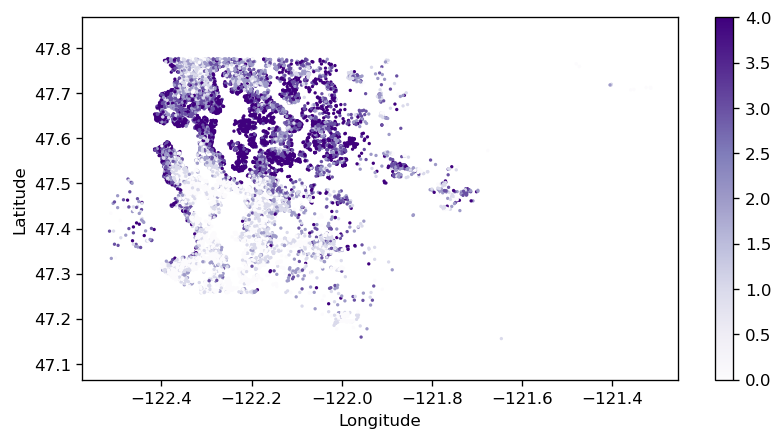

In [809]:
#create figure 
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot

#create scatter plot 
plt.scatter(x=df_train['long'], y=df_train['lat'], s= 1, c=df_train['price_categorical'], cmap ='Purples')
plt.colorbar()

plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');

## Task 2

### a)

In [810]:
#average price per zipcode
ser_Averages = df_train.groupby('zipcode').mean()['price']


In [811]:
#max average price
maxAvgPrice = df_train.groupby('zipcode').mean()['price'].max()
ser_Averages.loc[ser_Averages == maxAvgPrice]


zipcode
98039    1.395409e+06
Name: price, dtype: float64

### b)

In [812]:
df_train['predict_price'] = df_train['zipcode'].replace(ser_Averages)

In [813]:
#store predicted values in a new series
ser_predict = df_train['predict_price']

#store actual price in another series
ser_actual = df_train['price']

In [814]:
#prediction error of id 10 and round to 2 decimals

round(ser_predict.loc[10]-ser_actual.loc[10],2)

237763.66

### c)

In [815]:
prediction_error = 0 
for ids in range(len(df_train.index)):
    prediction_error += abs(df_train.price[ids] - df_train.predict_price[ids])
    
prediction_error /= len(df_train.index)
round(prediction_error,2)

142991.82

### d)

In [816]:
#data of id10 

df_train.loc[10,:]

date                    2021-02-19
price                     529000.0
bedrooms                         3
bathrooms                     1.75
sqft_living                   1500
sqft_lot                      7367
floors                         1.0
waterfront                       0
view                             0
condition                        3
grade                            8
sqft_above                    1500
sqft_basement                    0
yr_built                      1974
yr_renovated                     0
zipcode                      98033
lat                        47.6722
long                      -122.167
sqft_living15                 1920
sqft_lot15                    7579
price_categorical              3.0
predict_price        766763.661157
Name: 10, dtype: object

In [817]:
df_train.groupby('zipcode').mean().loc[98033,:]

price                766763.661157
bedrooms                  3.545455
bathrooms                 2.310950
sqft_living            2307.892562
sqft_lot              10310.214876
floors                    1.460744
waterfront                0.000000
view                      0.223140
condition                 3.504132
grade                     7.983471
sqft_above             1989.607438
sqft_basement           318.285124
yr_built               1978.239669
yr_renovated             82.549587
lat                      47.679910
long                   -122.187731
sqft_living15          2197.491736
sqft_lot15             9537.822314
price_categorical         3.219008
predict_price        766763.661157
Name: 98033, dtype: float64

### e)

In [818]:
#average price per zipcode for DataFrame Validation 
ser_Averages_Val = df_validation.groupby('zipcode').mean()['price']
ser_Averages_Val

zipcode
98001    3.087786e+05
98002    2.391159e+05
98003    3.154275e+05
98004    1.220138e+06
98005    9.232480e+05
             ...     
98177    6.014930e+05
98178    3.151868e+05
98188    2.808918e+05
98198    2.922692e+05
98199    8.177951e+05
Name: price, Length: 70, dtype: float64

In [819]:
#replacement 
df_validation['predict_price'] = df_validation['zipcode'].replace(ser_Averages_Val)


In [820]:
#calculate the mean abs prediction error 

error_val = 0 
for ids in df_validation.index:
    error_val += abs(df_validation.price[ids] - df_validation.predict_price[ids])
    
error_val /= len(df_validation.index)
round(error_val,2)

141839.34

## Task 3

### a)

In [821]:
#yr_built to age for training dataset
age = df_train.yr_built
ageMap = {}
for value in age:
    ageMap[value] = 2021 - value
ageMap

df_train['age'] = df_train['yr_built'].replace(ageMap)
df_train['age'].max()

121

### b)

In [822]:
# Renovated for training dataset
renovated = df_train.yr_renovated
renovatedMap = {}
for value in renovated:
    if value == 0:
        renovatedMap[value] = 0
    if value != 0:
        renovatedMap[value] = 1
renovatedMap

df_train['renovated'] = df_train['yr_renovated'].replace(renovatedMap)


In [823]:
df_train_renovated_count = df_train.renovated.value_counts()
df_train_renovated_count

0    12213
1      522
Name: renovated, dtype: int64

In [824]:
#the fraction of renovated houses would be 
round(df_train_renovated_count[1] / (df_train_renovated_count[1]+df_train_renovated_count[0]),2)

0.04

### c)

In [825]:
#prepare dataset and drop the irrelevant columns

df_train_linear = df_train.drop(columns=['date','lat','long','zipcode','yr_built','yr_renovated','predict_price','price_categorical'])


In [826]:
#Define relevant features # same order as the exercise

numerical_features2 = ['bedrooms', 'bathrooms', 'waterfront', 'view',
                            'condition', 'grade', 'sqft_living', 'sqft_lot',
                            'floors', 'sqft_above', 'sqft_basement', 'sqft_living15',
                            'sqft_lot15', 'age', 'renovated']

In [827]:
#prepare numerical data training dataset

df_train_linear_num = df_train_linear[numerical_features2]


In [828]:
#prepare data
x_train = df_train_linear[numerical_features2]
y_train = df_train_linear['price']

In [829]:
#fit model to data

model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [830]:
#display betas

round(pd.Series(model.coef_, index = x_train.columns),2)

bedrooms         -23453.34
bathrooms         35061.60
waterfront       293039.61
view              36334.81
condition         20334.81
grade            113536.38
sqft_living          70.61
sqft_lot              0.18
floors            47724.09
sqft_above           23.35
sqft_basement        47.26
sqft_living15        50.70
sqft_lot15           -0.49
age                3190.92
renovated         21959.66
dtype: float64

In [831]:
#display interception

round(model2.intercept_,2)

-947248.6

### d)

In [832]:
#make prediction to all objects

pred_mod2_train = model2.predict(x_train)

df_train['pred_mod2'] = pred_mod2_train
df_train['pred_mod2'] = pred_mod2_train

In [833]:
#predict price of id 10 
pred_mod2_train[10]

446674.5100431009

In [834]:
#prediction error of id 10 
round(pred_mod2_train[10] - ser_actual.loc[10],2)

-82325.49

### e)

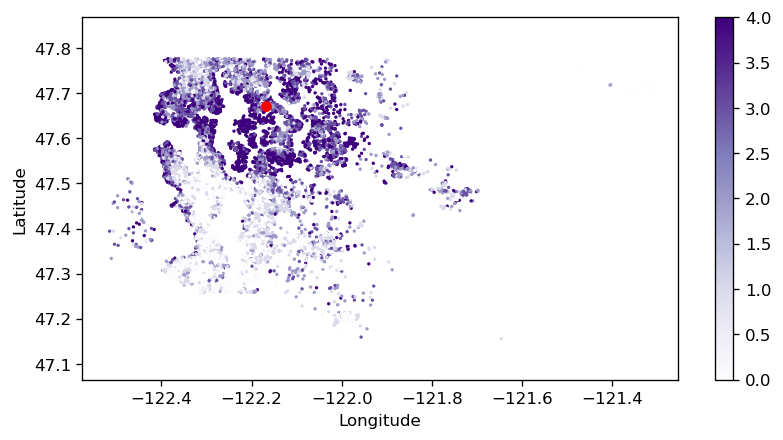

In [835]:
#create figure 
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot

#create scatter plot 
plt.scatter(x=df_train['long'], y=df_train['lat'], s= 1, c=df_train['price_categorical'], cmap ='Purples')
plt.colorbar()

plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude')



plt.scatter(x=df_train.loc[10].long, y = df_train.loc[10].lat, s=30, c = 'r')
#plt.scatter(x=df_validation.loc[min_error2].long, y = df_validation.loc[min_error2].lat, s=100, c = 'b')

### g)

In [836]:
#yr_built to age for validation dataset
age_validation = df_validation.yr_built
ageMap_validation = {}
for value in age_validation:
    ageMap_validation[value] = 2021 - value
    
df_validation['age'] = df_validation['yr_built'].replace(ageMap_validation)

In [837]:
# Renovated for validation dataset
renovated_validation = df_validation.yr_renovated
renovatedMap_validation = {}
for value in renovated_validation:
    if value == 0:
        renovatedMap_validation[value] = 0
    if value != 0:
        renovatedMap_validation[value] = 1
        
df_validation['renovated'] = df_validation['yr_renovated'].replace(renovatedMap_validation)

In [838]:
#prepare numerical data training dataset

#prepare data
x_validation2 = df_validation[numerical_features2]

# Predict price for validation dataset
pred_validation2 = model.predict(x_validation2)

df_validation['pred_mod2'] = pred_validation2

round(df_validation['pred_mod2'].mean(), 2)

525453.54

### h)

In [839]:
round(df_validation['price'].mean(),2)

522883.03

## Task 4

### a)

In [840]:
#calculate the absolute prediction error for each object 
# in train
abs_error2_train = abs(df_train['pred_mod2']-df_train['price'])
error2_train = df_train['pred_mod2']-df_train['price']


# calculate the mean absolute error, rounded to 2 decimals
# in train

mean_abs_train2 = round(abs_error2_train.mean(), 2)


#calculate the absolute prediction error for each object 
# in validation
abs_error2_validation = abs(df_validation['pred_mod2']-df_validation['price'])
error2_validation = df_validation['pred_mod2']-df_validation['price']

# calculate the mean absolute error, rounded to 2 decimals
# in validation

mean_abs_validation2 = round(abs_error2_validation.mean(), 2)

In [841]:
print(mean_abs_train2)
print(mean_abs_validation2)

122842.39
122357.24


### b)

In [842]:
# Add the prediction errors to my validation dataframe
df_validation['error2'] = round(error2_validation,2)

# Add the prediction errors to my training dataframe
df_train['error2'] = round(error2_validation,2)

# Apply equal frequency binning
discretizer = KBinsDiscretizer(n_bins=5, strategy='quantile',
                               encode='ordinal')
features = ['error2']
error2_categorical = discretizer.fit_transform(df_validation[features])
df_validation['error2_categorical'] = error2_categorical

print (discretizer.bin_edges_[0])


[-985168.15  -104969.84   -22060.608   48499.162  125483.704  692303.16 ]


### c)

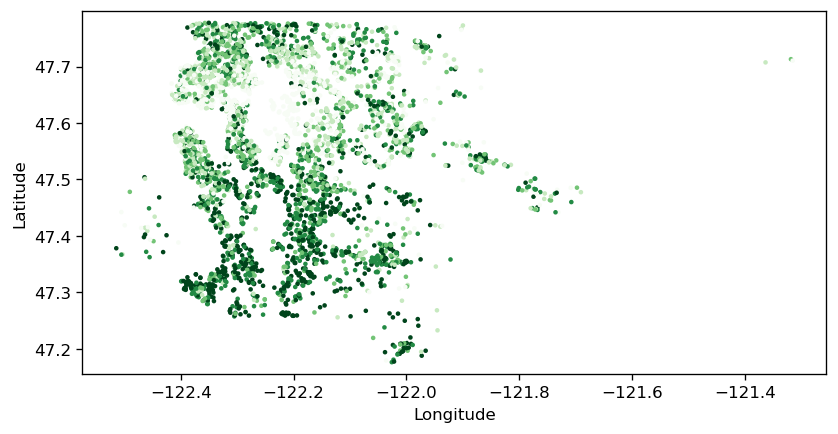

In [843]:
# Scatter plot
# Create figure
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot
plt.scatter(x=df_validation['long'], y=df_validation['lat'], s=3, c = df_validation['error2_categorical'], cmap = 'Greens')
plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');

### d)

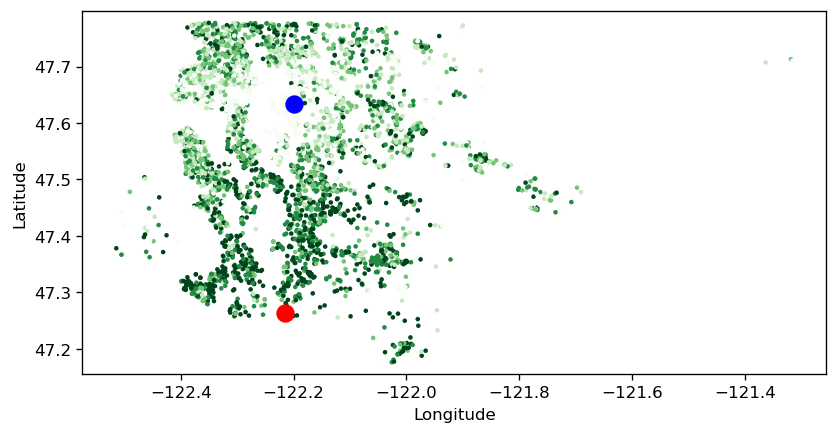

In [844]:
# Scatter plot
# Create figure
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot
plt.scatter(x=df_validation['long'], y=df_validation['lat'], s=3, c = df_validation['error2_categorical'], cmap = 'Greens')
plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');


max_error2 = df_validation['error2'].idxmax()
min_error2 = df_validation['error2'].idxmin()

plt.scatter(x=df_validation.loc[max_error2].long, y = df_validation.loc[max_error2].lat, s=100, c = 'r')
plt.scatter(x=df_validation.loc[min_error2].long, y = df_validation.loc[min_error2].lat, s=100, c = 'b')

In [845]:
# ID of max and minimum errors
# Highest positive error
print(max_error2)
print(df_validation['error2'].max())

#Highest negative error
print(min_error2)
print(df_validation['error2'].min())



13246
692303.16
15872
-985168.15


## Task 5

### a)

Develop a new model f3

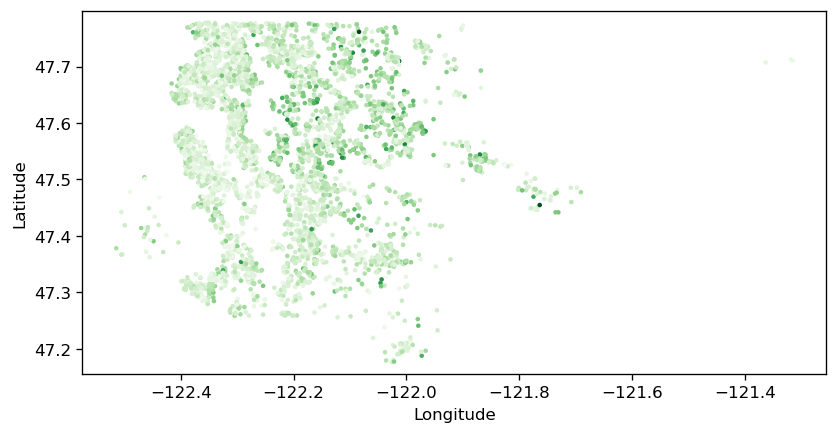

In [846]:
# sqft_living distribution
# Scatter plot
# Create figure
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot
plt.scatter(x=df_validation['long'], y=df_validation['lat'], s=3, c = df_validation['sqft_living'], cmap = 'Greens')
plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [847]:
# Add new relevant variables to TRAINING DATASET

## Define relevant features
microsoft = [47.641944, -122.12722] # lat long of microsoft headquarters
citycenter = [47.604330916, -122.336165322] # lat long of downtown city center (Seattle Art Museum)

# Variable: close2Micro: measures proximity to microsoft headquarters (tech boom: high salary tech workers)
df_train['close2Micro'] = 1/(np.sqrt((df_train['lat']-microsoft[0])**2+(df_train['long']-microsoft[1])**2))

# Variable: citycenter: measures proximity to city center
df_train['citycenter'] = 1/(np.sqrt((df_train['lat']-citycenter[0])**2+(df_train['long']-citycenter[1])**2)**2)

# Variable: center: distance to both citycenter and microsoft: very high prices in that zone
df_train['center'] = df_train['citycenter']* df_train['close2Micro']

# Varaible: sizecenter : city center flats tend to be smaller so we interact city center with living space
# big city center flats have a very high premium on price
df_train['sizecenter'] = 1/df_train['citycenter']*df_train['sqft_living']

#Variable watercenter: interact waterfront with city center property: high price premium
df_train['watercenter'] = 1/df_train['citycenter']*df_train['waterfront']

# Use age2 for to account for age of the building
df_train['age2'] = df_train['age']*df_train['age']


In [848]:
# Define the numerical features used in model3
numerical_features3 = ['bathrooms', 'sqft_living', 'sqft_lot',
                      'floors', 'sqft_above','sqft_basement','yr_built', 'yr_renovated',
                        'close2Micro', 'citycenter', 'sizecenter', 'watercenter', 'age2']

# Define the categorical features used in model3
categorical_features3 = ['waterfront', 'view', 'condition', 'grade', 'zipcode']


In [849]:
# Build the numerical and categorical dataframes for the training dataset
df_num_train = df_train[numerical_features3]

encoder = OneHotEncoder(drop='first', sparse=False)
values = encoder.fit_transform(df_train[categorical_features3])
names = encoder.get_feature_names(categorical_features3)
df_cat_train = pd.DataFrame(values, columns=names, index=df_train.index)

# Build x_train3
x_train3 = pd.concat([df_cat_train, df_num_train], axis=1)

# Build y_train3
y_train3 = df_train['price']


In [850]:
# Fit model 3 to data

model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [851]:
# Predict the price using the training dataset 
pred_mod3_train = model3.predict(x_train3)

# Add our prediction to the dataset
df_train['pred_mod3'] = pred_mod3_train

In [852]:
# Look at the coefficients
round(pd.Series(model3.coef_, index = x_train3.columns),2)

waterfront_1     381925.66
view_1            86377.66
view_2            69778.11
view_3           151955.65
view_4           250848.71
                   ...    
close2Micro         121.10
citycenter          -48.90
sizecenter         -378.67
watercenter    -1372652.14
age2                 10.66
Length: 99, dtype: float64

In [853]:
#calculate the absolute prediction error for each object 
# in train
df_train['error3'] = df_train['pred_mod3']-df_train['price']
abs_error3_train = abs(df_train['pred_mod3']-df_train['price'])

# calculate the mean absolute error, rounded to 2 decimals
# in train

mean_abs_train3 = round(abs_error3_train.mean(), 2)
mean_abs_train3

74800.65

### b)

In [854]:
# Add new relevant variables to VALIDATION DATASET

# Add variables close2Micro and citycenter: both are distances from property to either Microsoft headquarters or the city center
df_validation['close2Micro'] = 1/(np.sqrt((df_validation['lat']-microsoft[0])**2+(df_validation['long']-microsoft[1])**2))
df_validation['citycenter'] = 1/(np.sqrt((df_validation['lat']-citycenter[0])**2+(df_validation['long']-citycenter[1])**2)**2)
df_validation['center'] = df_validation['citycenter']* df_validation['close2Micro']
df_validation['sizecenter'] = 1/df_validation['citycenter']*df_validation['sqft_living']
df_validation['watercenter'] = 1/df_validation['citycenter']*df_validation['waterfront']



df_validation['age2'] = df_validation['age']*df_validation['age']
df_validation['view2'] = df_validation['view']*df_validation['view']

In [855]:
# Build the numerical and categorical dataframes for the validation dataset
df_num_validation = df_validation[numerical_features3]

encoder = OneHotEncoder(drop='first', sparse=False)
values = encoder.fit_transform(df_validation[categorical_features3])
names = encoder.get_feature_names(categorical_features3)
df_cat_validation = pd.DataFrame(values, columns=names, index=df_validation.index)

# Build x_validation3
x_validation3 = pd.concat([df_cat_validation, df_num_validation], axis=1)


In [856]:
# Predict the price using the validation dataset 
pred_mod3_validation = model3.predict(x_validation3)

# Add our prediction to the dataset
df_validation['pred_mod3'] = pred_mod3_validation

In [857]:
#calculate the absolute prediction error for each object 
# in validation

abs_error3_validation = abs(df_validation['pred_mod3']-df_validation['price'])

# calculate the mean absolute error, rounded to 2 decimals
# in validation

mean_abs_validation3 = round(abs_error3_validation.mean(), 2)
mean_abs_validation3

73904.45

### c)

In [858]:
# Add the prediction errors to my validation dataframe
error3_validation = df_validation['pred_mod3']-df_validation['price']
df_validation['error3'] = round(error3_validation,2)


# Apply equal frequency binning
discretizer = KBinsDiscretizer(n_bins=5, strategy='quantile',
                               encode='ordinal')
features = ['error3']
error3_categorical = discretizer.fit_transform(df_validation[features])
df_validation['error3_categorical'] = error3_categorical

print (discretizer.bin_edges_[0])


[-726405.52   -58990.006  -16341.702   22093.386   70324.746  586294.17 ]


### d)

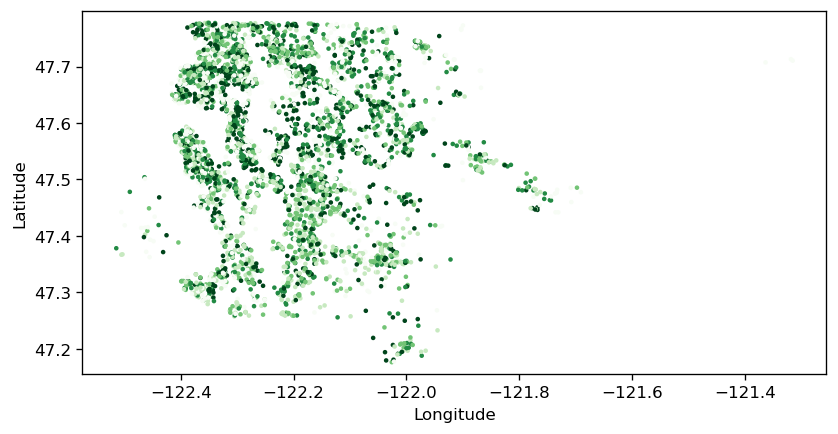

In [859]:
# Scatter plot
# Create figure
plt.figure(figsize=(8, 4), dpi = 120) # Create scatterplot
plt.scatter(x=df_validation['long'], y=df_validation['lat'], s=3, c = df_validation['error3_categorical'], cmap = 'Greens')
plt.axis("equal")

# Add x- and y-label
plt.xlabel('Longitude')
plt.ylabel('Latitude');

## Task 6

### a)

In [860]:
# Import test dataset: current_listings.csv
df_test = pd.read_csv('current_listings.csv',index_col = 'id')
df_test.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
16980,2021-11-02,350000.0,3,2.25,1760,9621,2.0,0,0,3,7,1760,0,1995,0,98019,47.7466,-121.979,1810,6589
16981,2021-11-02,178000.0,3,1.00,840,6500,1.0,0,0,5,6,840,0,1969,0,98042,47.3704,-122.080,870,5200
16982,2021-11-02,300000.0,3,1.75,1700,8481,2.0,0,0,3,7,1700,0,1993,0,98003,47.2623,-122.305,1830,6600
16983,2021-11-02,628000.0,5,2.75,2830,11795,1.0,0,0,4,7,1710,1120,1960,0,98008,47.5828,-122.118,2460,10880
16984,2021-11-02,313000.0,2,1.00,1180,4900,1.0,0,0,5,6,1180,0,1954,0,98027,47.5321,-122.029,1650,7121


#### Prepare test dataset to run model 3

In [861]:
# Add new relevant variables to TEST DATASET

#yr_built to age for training dataset
age = df_test.yr_built
ageMap_test = {}
for value in age:
    ageMap_test[value] = 2021 - value


df_test['age'] = df_test['yr_built'].replace(ageMap_test)

# Renovated for training dataset
renovated = df_test.yr_renovated
renovatedMap_test = {}
for value in renovated:
    if value == 0:
        renovatedMap_test[value] = 0
    if value != 0:
        renovatedMap_test[value] = 1

df_test['renovated'] = df_test['yr_renovated'].replace(renovatedMap_test)

# Variable: close2Micro: measures proximity to microsoft headquarters (tech boom: high salary tech workers)
df_test['close2Micro'] = 1/(np.sqrt((df_test['lat']-microsoft[0])**2+(df_test['long']-microsoft[1])**2))

# Variable: citycenter: measures proximity to city center
df_test['citycenter'] = 1/(np.sqrt((df_test['lat']-citycenter[0])**2+(df_test['long']-citycenter[1])**2)**2)

# Variable: citycenter: distance to both citycenter and microsoft: very high prices in that zone
df_test['center'] = df_test['citycenter']* df_test['close2Micro']

# Varaible: sizecenter : city center flats tend to be smaller so we interact city center with living space
# big city center flats have a very high premium on price
df_test['sizecenter'] = 1/df_test['citycenter']*df_test['sqft_living']

#Variable watercenter: interact waterfront with city center property: high price premium
df_test['watercenter'] = 1/df_test['citycenter']*df_test['waterfront']

# Use age2 for to account for age of the building
df_test['age2'] = df_test['age']*df_test['age']



In [862]:
# Build the numerical and categorical dataframes for the test dataset
df_num_test = df_test[numerical_features3]

encoder = OneHotEncoder(drop='first', sparse=False)
values = encoder.fit_transform(df_test[categorical_features3])
names = encoder.get_feature_names(categorical_features3)
df_cat_test = pd.DataFrame(values, columns=names, index=df_test.index)

# Build x_validation3
x_test3 = pd.concat([df_cat_test, df_num_test], axis=1)


In [863]:
# Predict the price using the test dataset and model 3
# Store it in serie pred_mod3_test
pred_mod3_test = model3.predict(x_test3)

# Add our prediction to the dataset
df_test['pred_mod3'] = pred_mod3_test

### b)

Identify profit opportunities:

Profit opportunities arise when listed price is lower than our predicted price

In [864]:
# I create a serie that contains all the price differences 
# between my predicted price and the listed price
# when the difference is positive, I have identified a profit opportunity
diff_mod3_test = df_test['pred_mod3'] - df_test['price']

df_test['diff'] = diff_mod3_test

# Renovated for training dataset
profitMap_test = {}
for value in profit:
    if value >= 0:
        profitMap_test[value] = 1
    if value < 0:
        profitMap_test[value] = 0
profitMap_test


df_test['profit_opp'] = df_test['diff'].replace(profitMap_test)


# I store the profits in a new serie
profit_mod3_test = df_test['diff'] * df_test['profit_opp']

# I store the profits in my test dataframe
df_test['profit'] = profit_mod3_test


# I compute the sum of all the potential profits.
profit_mod3_test.sum()

163665444.03217015

### c)

Compute profits for all the objects in relation to listed price.
Store the profits per dollar invested in a new series.

Profits per dollar is computed by dividing profit by the price paid by the pension fund

profit per dollar invested ppdi

In [865]:
# I compute profits per dollar invested and store them in a new serie
ppdi_mod3_test = (profit_mod3_test)/df_test['price']

# Add to df_test
df_test['ppdi'] = ppdi_mod3_test

### d)

In [866]:
# Sort dataframe so that properties with the highest ppdi are first
# select the 4 properties with highest ppdi
df_test_max = df_test.sort_values('ppdi', ascending = False)[0:4]

budget_4 = df_test_max['price'].sum()

profit_4 = df_test_max['profit'].sum()
